In [1]:
from plot_conv_seperate import plot_map, plot_q_values, plot_variance

In [2]:
import os, pandas as pd, matplotlib.pyplot as plt, numpy as np
from matplotlib.lines import Line2D

In [19]:
def plot_legend(styles, result_dir=None):
    # Plot the legend
    i = 0
    for style in styles:
        fig, ax = plt.subplots()
        # Create custom lines that will be used as legend entries
        custom_lines = [Line2D([0], [0], **style_element) for keys, style_element in style.items()]
       
        ax.axis('off')
        
        #ax.legend(custom_lines, style.keys(), loc='center')
        # Create the legend from the line objects
        legend = plt.legend(custom_lines, style.keys(), loc='center')

        if 'runtime' not in style.keys():
            legend.set_title(r"Agent: Action=[$v, \omega$]")

        plt.tight_layout()
        
        # Set the figure size to fit the legend, adjust as needed
        fig.set_size_inches(1.5,1.5)

        plt.savefig(result_dir+"/legend_style_{}.svg".format(i), format="svg", bbox_inches='tight', transparent=True, pad_inches=0, bbox_extra_artists=[legend])
        plt.savefig(result_dir+"/legend_style_{}.png".format(i), dpi=200, bbox_inches='tight', transparent=True, pad_inches=0, bbox_extra_artists=[legend])
        i += 1 # different style part
    #ax.set_title('Actions [v, $\omega$] \nof both agents')

In [20]:
def plot_num_values(ax1, ax11, data_frame, styles):
    ax1.set_facecolor('white')

    # Group the DataFrame by 'agent' and 'action'
    grouped = data_frame.groupby(['agent', 'action'])

    # Plot payoff_mean data
    for (agent, action), group in grouped:
        ax1.plot(group['num_iter'], group['num_count_mean']/group['num_iter'], label=f'Agent {agent}, Action {action}', **styles[f'{agent}: {action}'])

    # Change labels and scales
    ax1.set_xticks(np.arange(100, 5000, step=500))

    # Adding labels and title
    ax1.set_xlabel(r'$n_{iter}$')
    ax1.set_ylabel('$\overline{n}$$_{visit}$/$n_{iter}$')

    # Plot the runtime data
    for (agent, action), group in grouped:
        ax11.plot(group['num_iter'], group['runtime'], label='runtime', **styles['runtime'])
        ax11.set_ylabel('Runtime (in sec)')
        # Set the limits of the y-axis based on the data
        y_min = group['runtime'].min()
        y_max = group['runtime'].max()
        ax11.set_ylim([y_min, y_max])
        break

In [21]:
import os
### FOLLOWING UNIFORM SAMPLING

# Configuration
exp_name = "00_convergence_following/duct-sampling_uniform-expand_every"
script_dir = os.getcwd()
data_dir = os.path.abspath(os.path.join(script_dir, os.pardir))
main_dir = os.path.abspath(os.path.join(data_dir, os.pardir))
input_dir_raw = os.path.join(main_dir, "data_raw", exp_name)
input_dir_processed = os.path.join(data_dir, exp_name)

result_dir = os.path.join(main_dir, "results/")

if not os.path.exists(result_dir):
    os.makedirs(result_dir)
if not os.path.exists(os.path.join(result_dir, exp_name)):
    os.makedirs(os.path.join(result_dir, exp_name))

print(input_dir_raw)
print(input_dir_processed)

max_game_length = 12 # plot game length from 1 to n

goal_state = [14,3] #[x,y]

#num_actions_0 = len(df['action'].unique())
#num_actions_1 = len(df['action'].unique())

num_actions_0 = 6
num_actions_1 = 6

orange_colors = plt.cm.Oranges(np.linspace(0.2, 0.8, num_actions_0))
blue_colors = plt.cm.Blues(np.linspace(0.2, 0.8, num_actions_1))
markers = ['o', 'v', '^', '*', '+', 'x', 'D', 'd', '|', '_']

styles_0 = {
    '0: [0.0, -1.57]': {'color': orange_colors[0], 'marker': '<'},
    '0: [0.0, 0.0]': {'color': orange_colors[1], 'marker': 'o'},
    '0: [0.0, 1.57]': {'color': orange_colors[2], 'marker': '>'},
    '0: [1.0, -1.57]': {'color': orange_colors[3], 'marker': '<'},
    '0: [1.0, 0.0]': {'color': orange_colors[4], 'marker': '^'},
    '0: [1.0, 1.57]': {'color': orange_colors[5], 'marker': '>'},
}
styles_1 = {
    '1: [0.0, -1.57]': {'color': blue_colors[0], 'marker': '<'},
    '1: [0.0, 0.0]': {'color': blue_colors[1], 'marker': 'o'},
    '1: [0.0, 1.57]': {'color': blue_colors[2], 'marker': '>'},
    '1: [1.0, -1.57]': {'color': blue_colors[3], 'marker': '<'},
    '1: [1.0, 0.0]': {'color': blue_colors[4], 'marker': '^'},
    '1: [1.0, 1.57]': {'color': blue_colors[5], 'marker': '>'},
}
styles_runtime = {
    'runtime': {'color': 'black', 'linestyle': '--'},
}

styles = {**styles_0, **styles_1, **styles_runtime}

/home/enjay/0_thesis/motion-planning-using-sm-mcts/data_raw/00_convergence_following/duct-sampling_uniform-expand_every
/home/enjay/0_thesis/motion-planning-using-sm-mcts/data_processed/00_convergence_following/duct-sampling_uniform-expand_every


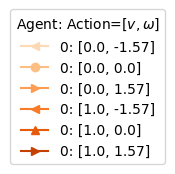

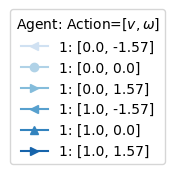

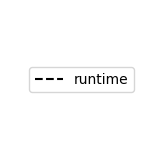

In [22]:
#plot legend seperately
plot_legend([styles_0, styles_1, styles_runtime], result_dir = result_dir+exp_name);

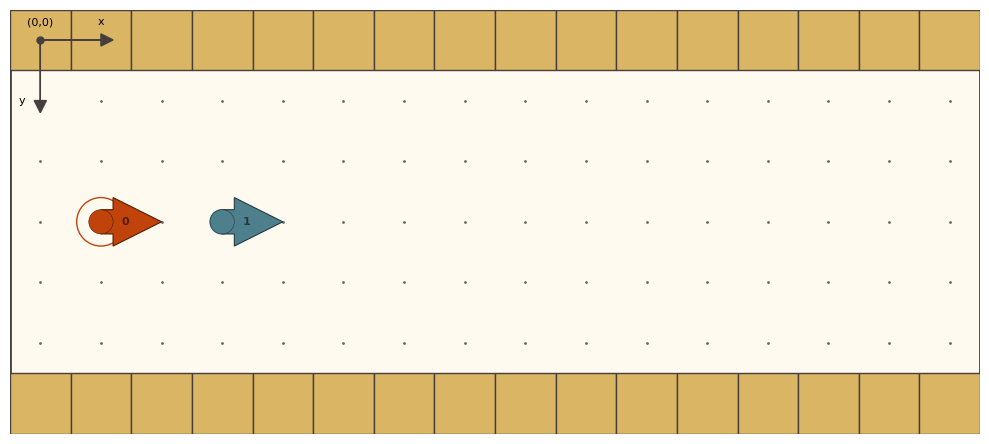

In [34]:
# plot map with zero length
fig, ax = plt.subplots(figsize=(10, 5))
plot_map(ax, input_dir_raw, 0)
plt.tight_layout()
plt.savefig(result_dir+exp_name+"/0-0.0_Reachable states within the environment.svg", format="svg", bbox_inches='tight')
plt.savefig(result_dir+exp_name+"/0-0.0_Reachable states within the environment.png", dpi=200)

Saved plot for game length:  1
Saved plot for game length:  1
Saved plot for game length:  1
Error in game length:  2
Saved plot for game length:  3
Saved plot for game length:  3
Saved plot for game length:  3
Error in game length:  4
Saved plot for game length:  5
Saved plot for game length:  5
Saved plot for game length:  5
Error in game length:  6
Saved plot for game length:  7
Saved plot for game length:  7
Saved plot for game length:  7
Error in game length:  8
Saved plot for game length:  9
Saved plot for game length:  9
Saved plot for game length:  9
Error in game length:  10
Error in game length:  11
Saved plot for game length:  12
Saved plot for game length:  12
Saved plot for game length:  12


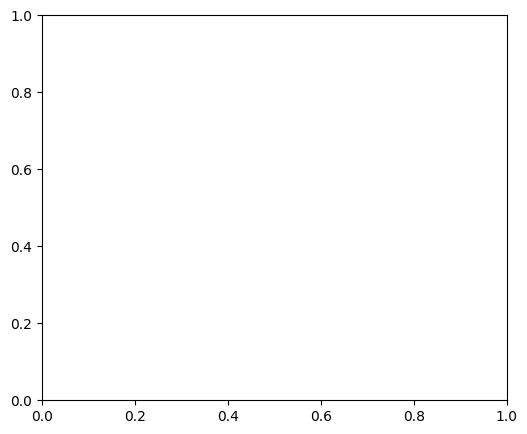

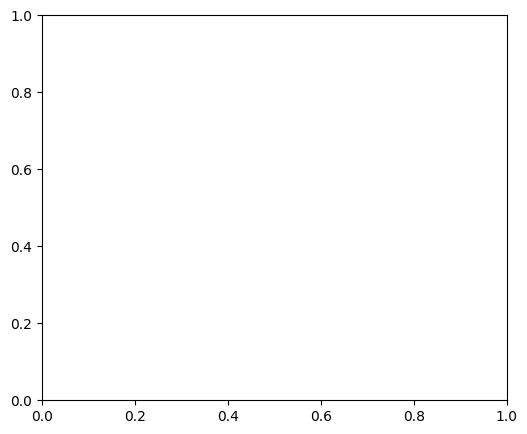

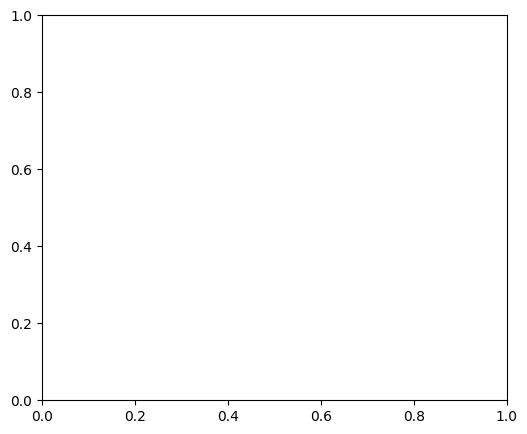

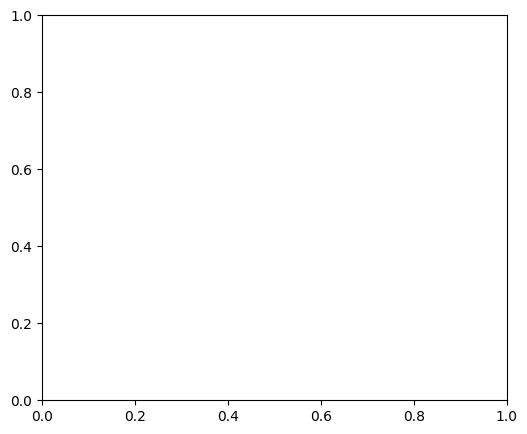

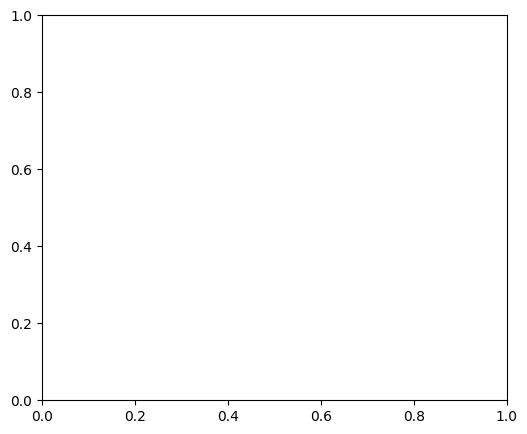

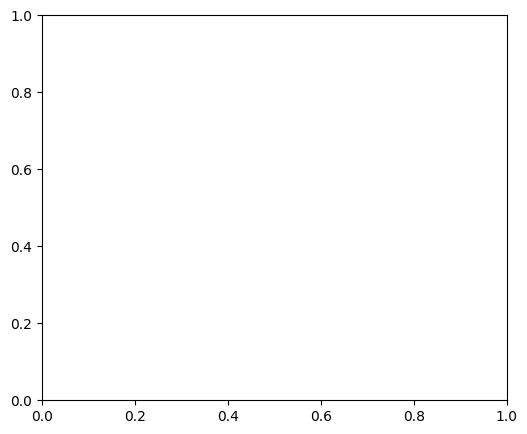

In [12]:
for game_length in range(1, max_game_length+1):
    try:
        for weight_interm in [0.0, 0.5, 1.0]:
            plot_functions = [plot_map, plot_q_values, plot_variance]
            plot_args = [(input_dir_raw, game_length), (input_dir_processed, game_length, weight_interm, styles), (input_dir_processed, game_length, weight_interm, styles)]
            plot_names = ['Reachable states within the environment', 'Q-values averaged over 10 runs', 'Variance of Q-values']
            fig_sizes = [(10, 5), (6, 5), (6, 5)]


            for plot_func, plot_arg, plot_name, fig_size in zip(plot_functions, plot_args, plot_names, fig_sizes):
                fig, ax = plt.subplots(figsize=fig_size)
                plot_func(ax, *plot_arg)
                #title_text = "Convergence of MCTS in overtaking scenario for a game lengths of  {} - {}".format(game_length, plot_name)
                #fig.suptitle(title_text, fontsize=12, fontweight='bold')

                # Save the plot
                plt.tight_layout()
                #plt.show()
                try:
                    plt.savefig(result_dir+exp_name+"/{}-{}_{}.svg".format(game_length, weight_interm, plot_name), format="svg", bbox_inches='tight')
                    plt.savefig(result_dir+exp_name+"/{}-{}_{}.png".format(game_length, weight_interm, plot_name), dpi=200)
                    #tikzplotlib.save(result_dir+exp_name+"/{}_{}.tex".format(game_length, plot_name),standalone=True)
                except:
                    continue
                plt.close()
            print("Saved plot for game length: ", game_length)
    except:
        print("Error in game length: ", game_length)
        continue



In [27]:
### FOLLOWING INFORMED SAMPLING


# Configuration
exp_name = "00_convergence_following/duct-sampling_informed-expand_every"
curr_dir = os.getcwd()
data_dir = os.path.abspath(os.path.join(curr_dir, os.pardir))
main_dir = os.path.abspath(os.path.join(data_dir, os.pardir))
input_dir_raw = os.path.join(main_dir, "data_raw", exp_name)
input_dir_processed = os.path.join(data_dir, exp_name)

result_dir = os.path.join(main_dir, "results/")

if not os.path.exists(result_dir):
    os.makedirs(result_dir)
if not os.path.exists(os.path.join(result_dir, exp_name)):
    os.makedirs(os.path.join(result_dir, exp_name))

print(input_dir_raw)
print(input_dir_processed)

max_game_length = 12 # plot game length from 1 to n

goal_state = [14,3] #[x,y]

#num_actions_0 = len(df['action'].unique())
#num_actions_1 = len(df['action'].unique())

num_actions_0 = 6
num_actions_1 = 6

orange_colors = plt.cm.Oranges(np.linspace(0.2, 0.8, num_actions_0))
blue_colors = plt.cm.Blues(np.linspace(0.2, 0.8, num_actions_1))
markers = ['o', 'v', '^', '*', '+', 'x', 'D', 'd', '|', '_']

styles_0 = {
    '0: [0.0, -1.57]': {'color': orange_colors[0], 'marker': '<'},
    '0: [0.0, 0.0]': {'color': orange_colors[1], 'marker': 'o'},
    '0: [0.0, 1.57]': {'color': orange_colors[2], 'marker': '>'},
    '0: [1.0, -1.57]': {'color': orange_colors[3], 'marker': '<'},
    '0: [1.0, 0.0]': {'color': orange_colors[4], 'marker': '^'},
    '0: [1.0, 1.57]': {'color': orange_colors[5], 'marker': '>'},
}
styles_1 = {
    '1: [0.0, -1.57]': {'color': blue_colors[0], 'marker': '<'},
    '1: [0.0, 0.0]': {'color': blue_colors[1], 'marker': 'o'},
    '1: [0.0, 1.57]': {'color': blue_colors[2], 'marker': '>'},
    '1: [1.0, -1.57]': {'color': blue_colors[3], 'marker': '<'},
    '1: [1.0, 0.0]': {'color': blue_colors[4], 'marker': '^'},
    '1: [1.0, 1.57]': {'color': blue_colors[5], 'marker': '>'},
}
styles_runtime = {
    'runtime': {'color': 'black', 'linestyle': '--'},
}

styles = {**styles_0, **styles_1, **styles_runtime}

/home/enjay/0_thesis/motion-planning-using-sm-mcts/data_raw/00_convergence_following/duct-sampling_informed-expand_every
/home/enjay/0_thesis/motion-planning-using-sm-mcts/data_processed/00_convergence_following/duct-sampling_informed-expand_every


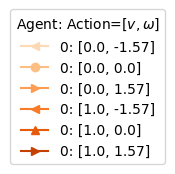

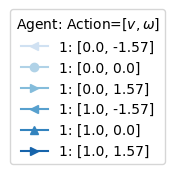

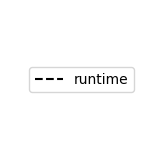

In [28]:
#plot legend seperately
plot_legend([styles_0, styles_1, styles_runtime], result_dir = result_dir+exp_name);

FileNotFoundError: [Errno 2] No such file or directory: '/home/enjay/0_thesis/motion-planning-using-sm-mcts/data_processed/data_raw/00_convergence_following/duct-sampling_informed-expand_every'

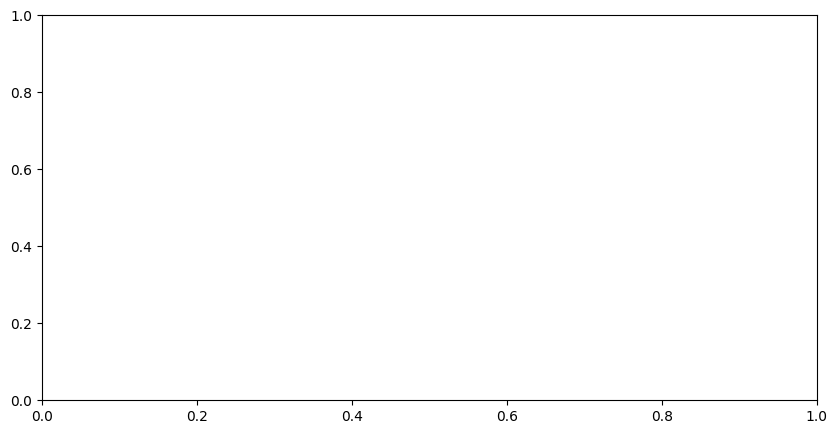

In [19]:
# plot map with zero length
fig, ax = plt.subplots(figsize=(10, 5))
plot_map(ax, input_dir_raw, 0)
plt.tight_layout()
plt.savefig(result_dir+exp_name+"/0-0.0_Reachable states within the environment.svg", format="svg", bbox_inches='tight')
plt.savefig(result_dir+exp_name+"/0-0.0_Reachable states within the environment.png", dpi=200)

Saved plot for game length:  1
Saved plot for game length:  1
Saved plot for game length:  1
Error in plotting for game length:  2
Saved plot for game length:  3
Saved plot for game length:  3
Saved plot for game length:  3
Error in plotting for game length:  4
Saved plot for game length:  5
Saved plot for game length:  5
Saved plot for game length:  5
Error in plotting for game length:  6
Saved plot for game length:  7
Saved plot for game length:  7
Saved plot for game length:  7
Error in plotting for game length:  8
Saved plot for game length:  9
Saved plot for game length:  9
Saved plot for game length:  9
Error in plotting for game length:  10
Error in plotting for game length:  11
Saved plot for game length:  12
Saved plot for game length:  12
Saved plot for game length:  12


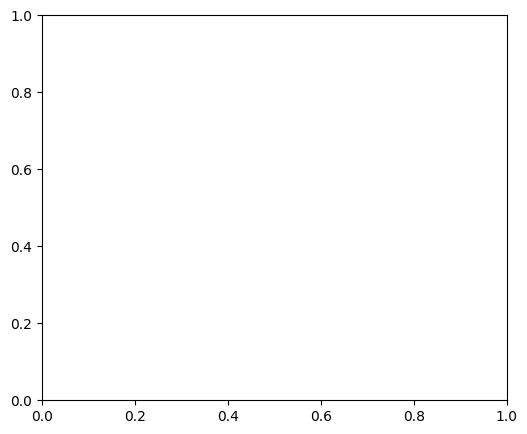

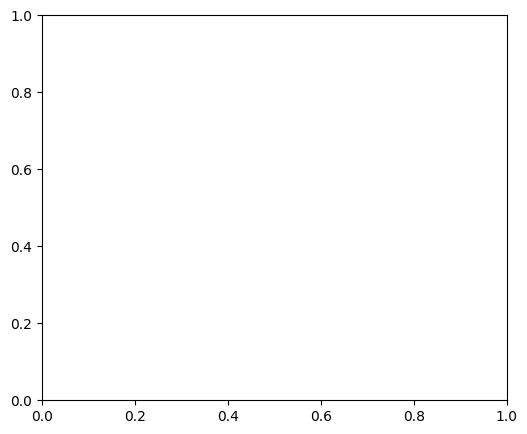

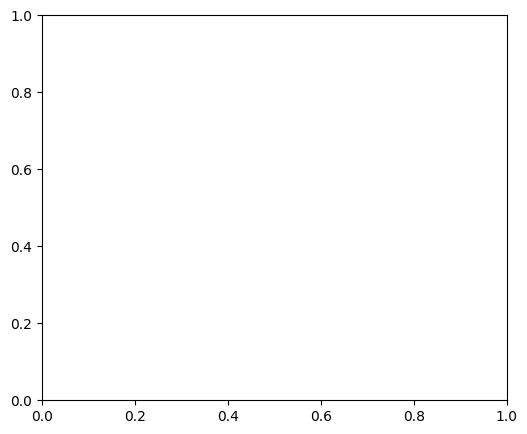

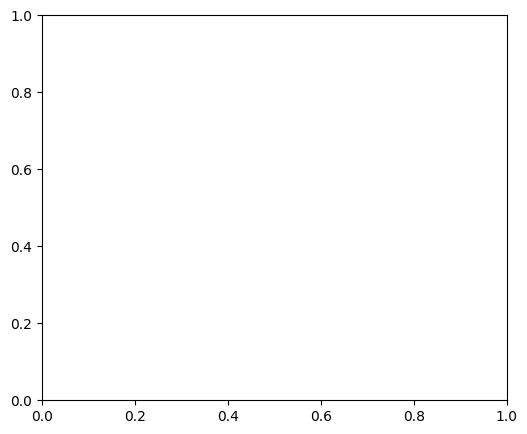

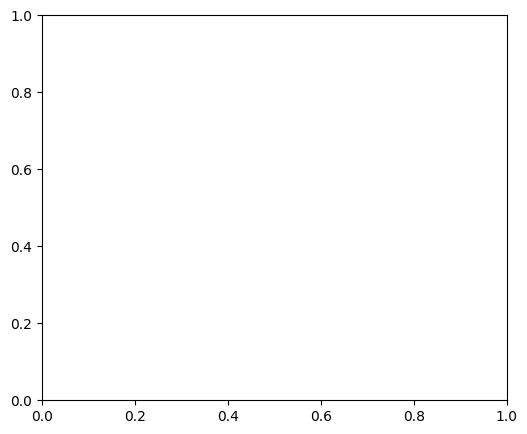

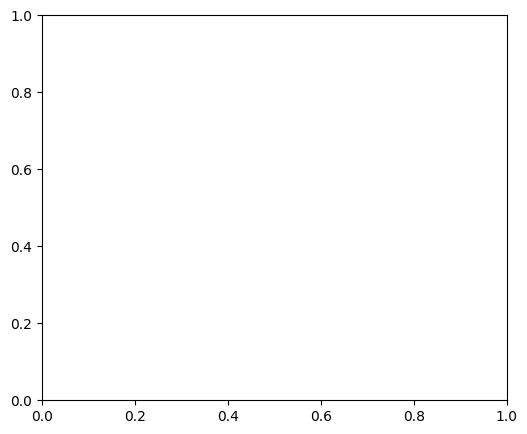

In [15]:
for game_length in range(1, max_game_length+1):
    try:
        for weight_interm in [0.0, 0.5, 1.0]:
            plot_functions = [plot_map, plot_q_values, plot_variance]
            plot_args = [(input_dir_raw, game_length), (input_dir_processed, game_length, weight_interm, styles), (input_dir_processed, game_length, weight_interm, styles)]
            plot_names = ['Reachable states within the environment', 'Q-values averaged over 10 runs', 'Variance of Q-values']
            fig_sizes = [(10, 5), (6, 5), (6, 5)]


            for plot_func, plot_arg, plot_name, fig_size in zip(plot_functions, plot_args, plot_names, fig_sizes):
                fig, ax = plt.subplots(figsize=fig_size)
                plot_func(ax, *plot_arg)
                #title_text = "Convergence of MCTS in overtaking scenario for a game lengths of  {} - {}".format(game_length, plot_name)
                #fig.suptitle(title_text, fontsize=12, fontweight='bold')

                # Save the plot
                plt.tight_layout()
                #plt.show()
                try:
                    plt.savefig(result_dir+exp_name+"/{}-{}_{}.svg".format(game_length, weight_interm, plot_name), format="svg", bbox_inches='tight')
                    plt.savefig(result_dir+exp_name+"/{}-{}_{}.png".format(game_length, weight_interm, plot_name), dpi=200)
                    #tikzplotlib.save(result_dir+exp_name+"/{}_{}.tex".format(game_length, plot_name),standalone=True)
                except:
                    continue
                plt.close()
            print("Saved plot for game length: ", game_length)
    except:
        print("Error in plotting for game length: ", game_length)
        continue



In [29]:
### OVERTAKING UNIFORM SAMPLING

# Configuration
exp_name = "00_convergence_overtaking/duct-sampling_uniform-expand_every"
curr_dir = os.getcwd()
data_dir = os.path.abspath(os.path.join(curr_dir, os.pardir))
main_dir = os.path.abspath(os.path.join(data_dir, os.pardir))
input_dir_raw = os.path.join(main_dir, "data_raw", exp_name)
input_dir_processed = os.path.join(data_dir, exp_name)

result_dir = os.path.join(main_dir, "results/")

if not os.path.exists(result_dir):
    os.makedirs(result_dir)
if not os.path.exists(os.path.join(result_dir, exp_name)):
    os.makedirs(os.path.join(result_dir, exp_name))

print(input_dir_raw)
print(input_dir_processed)

goal_state = [14,3] #[x,y]

#num_actions_0 = len(df['action'].unique())
#num_actions_1 = len(df['action'].unique())

num_actions_0 = 9
num_actions_1 = 6

orange_colors = plt.cm.Oranges(np.linspace(0.2, 0.8, num_actions_0))
blue_colors = plt.cm.Blues(np.linspace(0.2, 0.8, num_actions_1))
markers = ['o', 'v', '^', '*', '+', 'x', 'D', 'd', '|', '_']

styles_0 = {
    '0: [0.0, -1.57]': {'color': orange_colors[0], 'marker': '<'},
    '0: [0.0, 0.0]': {'color': orange_colors[1], 'marker': 'o'},
    '0: [0.0, 1.57]': {'color': orange_colors[2], 'marker': '>'},
    '0: [1.0, -1.57]': {'color': orange_colors[3], 'marker': '<'},
    '0: [1.0, 0.0]': {'color': orange_colors[4], 'marker': '^'},
    '0: [1.0, 1.57]': {'color': orange_colors[5], 'marker': '>'},
    '0: [2.0, -1.57]': {'color': orange_colors[6], 'marker': '<'},
    '0: [2.0, 0.0]': {'color': orange_colors[7], 'marker': '^'},
    '0: [2.0, 1.57]': {'color': orange_colors[8], 'marker': '>'},
}
styles_1 = {
    '1: [0.0, -1.57]': {'color': blue_colors[0], 'marker': '<'},
    '1: [0.0, 0.0]': {'color': blue_colors[1], 'marker': 'o'},
    '1: [0.0, 1.57]': {'color': blue_colors[2], 'marker': '>'},
    '1: [1.0, -1.57]': {'color': blue_colors[3], 'marker': '<'},
    '1: [1.0, 0.0]': {'color': blue_colors[4], 'marker': '^'},
    '1: [1.0, 1.57]': {'color': blue_colors[5], 'marker': '>'},
}
styles_runtime = {
    'runtime': {'color': 'black', 'linestyle': '--'},
}

styles = {**styles_0, **styles_1, **styles_runtime}

/home/enjay/0_thesis/motion-planning-using-sm-mcts/data_raw/00_convergence_overtaking/duct-sampling_uniform-expand_every
/home/enjay/0_thesis/motion-planning-using-sm-mcts/data_processed/00_convergence_overtaking/duct-sampling_uniform-expand_every


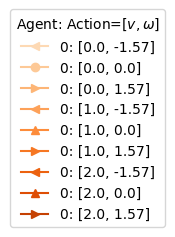

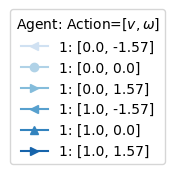

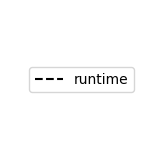

In [30]:
#plot legend seperately


plot_legend([styles_0, styles_1, styles_runtime], result_dir = result_dir+exp_name);

In [5]:
for game_length in range(1, 15+1):
    try:
        for weight_interm in [0.0, 0.5, 1.0]:
            plot_functions = [plot_map, plot_q_values, plot_variance]
            plot_args = [(input_dir_raw, game_length), (input_dir_processed, game_length, weight_interm, styles), (input_dir_processed, game_length, weight_interm, styles)]
            plot_names = ['Reachable states within the environment', 'Q-values averaged over 10 runs', 'Variance of Q-values']
            fig_sizes = [(10, 5), (6, 5), (6, 5)]


            for plot_func, plot_arg, plot_name, fig_size in zip(plot_functions, plot_args, plot_names, fig_sizes):
                fig, ax = plt.subplots(figsize=fig_size)
                plot_func(ax, *plot_arg)
                #title_text = "Convergence of MCTS in overtaking scenario for a game lengths of  {} - {}".format(game_length, plot_name)
                #fig.suptitle(title_text, fontsize=12, fontweight='bold')

                # Save the plot
                plt.tight_layout()
                #plt.show()
                try:
                    plt.savefig(result_dir+exp_name+"/{}-{}_{}.svg".format(game_length, weight_interm, plot_name), format="svg", bbox_inches='tight')
                    plt.savefig(result_dir+exp_name+"/{}-{}_{}.png".format(game_length, weight_interm, plot_name), dpi=200)
                    #tikzplotlib.save(result_dir+exp_name+"/{}_{}.tex".format(game_length, plot_name),standalone=True)
                except:
                    continue
                plt.close()
            print("Saved plot for game length: ", game_length)
    except:
        print("Error in plotting for game length: ", game_length)
        continue



Error in plotting for game length:  13


In [31]:
### OVERTAKING INFORMED SAMPLING

# Configuration
exp_name = "00_convergence_overtaking/duct-sampling_informed-expand_every"
curr_dir = os.getcwd()
data_dir = os.path.abspath(os.path.join(curr_dir, os.pardir))
main_dir = os.path.abspath(os.path.join(data_dir, os.pardir))
input_dir_raw = os.path.join(main_dir, "data_raw", exp_name)
input_dir_processed = os.path.join(data_dir, exp_name)

result_dir = os.path.join(main_dir, "results/")

if not os.path.exists(result_dir):
    os.makedirs(result_dir)
if not os.path.exists(os.path.join(result_dir, exp_name)):
    os.makedirs(os.path.join(result_dir, exp_name))

print(input_dir_raw)
print(input_dir_processed)

max_game_length = 15 # plot game length from 1 to n

goal_state = [14,3] #[x,y]

#num_actions_0 = len(df['action'].unique())
#num_actions_1 = len(df['action'].unique())

num_actions_0 = 9
num_actions_1 = 6

orange_colors = plt.cm.Oranges(np.linspace(0.2, 0.8, num_actions_0))
blue_colors = plt.cm.Blues(np.linspace(0.2, 0.8, num_actions_1))
markers = ['o', 'v', '^', '*', '+', 'x', 'D', 'd', '|', '_']

styles_0 = {
    '0: [0.0, -1.57]': {'color': orange_colors[0], 'marker': '<'},
    '0: [0.0, 0.0]': {'color': orange_colors[1], 'marker': 'o'},
    '0: [0.0, 1.57]': {'color': orange_colors[2], 'marker': '>'},
    '0: [1.0, -1.57]': {'color': orange_colors[3], 'marker': '<'},
    '0: [1.0, 0.0]': {'color': orange_colors[4], 'marker': '^'},
    '0: [1.0, 1.57]': {'color': orange_colors[5], 'marker': '>'},
    '0: [2.0, -1.57]': {'color': orange_colors[6], 'marker': '<'},
    '0: [2.0, 0.0]': {'color': orange_colors[7], 'marker': '^'},
    '0: [2.0, 1.57]': {'color': orange_colors[8], 'marker': '>'},
}
styles_1 = {
    '1: [0.0, -1.57]': {'color': blue_colors[0], 'marker': '<'},
    '1: [0.0, 0.0]': {'color': blue_colors[1], 'marker': 'o'},
    '1: [0.0, 1.57]': {'color': blue_colors[2], 'marker': '>'},
    '1: [1.0, -1.57]': {'color': blue_colors[3], 'marker': '<'},
    '1: [1.0, 0.0]': {'color': blue_colors[4], 'marker': '^'},
    '1: [1.0, 1.57]': {'color': blue_colors[5], 'marker': '>'},
}
styles_runtime = {
    'runtime': {'color': 'black', 'linestyle': '--'},
}

styles = {**styles_0, **styles_1, **styles_runtime}

/home/enjay/0_thesis/motion-planning-using-sm-mcts/data_raw/00_convergence_overtaking/duct-sampling_informed-expand_every
/home/enjay/0_thesis/motion-planning-using-sm-mcts/data_processed/00_convergence_overtaking/duct-sampling_informed-expand_every


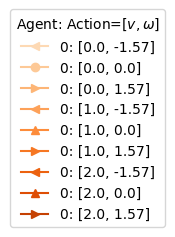

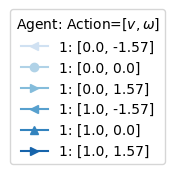

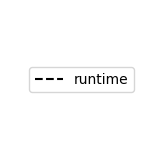

In [32]:
#plot legend seperately
plot_legend([styles_0, styles_1, styles_runtime], result_dir = result_dir+exp_name);

In [33]:
for game_length in range(1, max_game_length+1):
    try:
        for weight_interm in [0.0, 0.5, 1.0]:
            plot_functions = [plot_map, plot_q_values, plot_variance]
            plot_args = [(input_dir_raw, game_length), (input_dir_processed, game_length, weight_interm, styles), (input_dir_processed, game_length, weight_interm, styles)]
            plot_names = ['Reachable states within the environment', 'Q-values averaged over 10 runs', 'Variance of Q-values']
            fig_sizes = [(10, 5), (6, 5), (6, 5)]


            for plot_func, plot_arg, plot_name, fig_size in zip(plot_functions, plot_args, plot_names, fig_sizes):
                fig, ax = plt.subplots(figsize=fig_size)
                plot_func(ax, *plot_arg)
                #title_text = "Convergence of MCTS in overtaking scenario for a game lengths of  {} - {}".format(game_length, plot_name)
                #fig.suptitle(title_text, fontsize=12, fontweight='bold')

                # Save the plot
                plt.tight_layout()
                #plt.show()
                try:
                    plt.savefig(result_dir+exp_name+"/{}-{}_{}.svg".format(game_length, weight_interm, plot_name), format="svg", bbox_inches='tight')
                    plt.savefig(result_dir+exp_name+"/{}-{}_{}.png".format(game_length, weight_interm, plot_name), dpi=200)
                    #tikzplotlib.save(result_dir+exp_name+"/{}_{}.tex".format(game_length, plot_name),standalone=True)
                except:
                    continue
                plt.close()
            print("Saved plot for game length: ", game_length)
    except:
        print("Error in plotting for game length: ", game_length)
        continue



Error in plotting for game length:  1
Error in plotting for game length:  2
Error in plotting for game length:  3
Error in plotting for game length:  4
Error in plotting for game length:  5
Error in plotting for game length:  6
Error in plotting for game length:  7
Error in plotting for game length:  8
